In [ ]:
import seaborn as sns
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


# **Data Exploration and Preprocessing**

In [ ]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.columns.unique()

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,1
depth,0
table,0
price,0
x,1
y,0
z,0


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', 'e'], dtype=object)

In [ ]:
df['color'] = df['color'].str.upper()
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['clarity'].unique()
df = df[df['clarity'] != '8']
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'ideal',
       'very good'], dtype=object)

In [ ]:
df.loc[df['cut'] == 'ideal', 'cut'] = 'Ideal'
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'very good'],
      dtype=object)

In [ ]:
df.duplicated().sum()

np.int64(146)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

/tmp/ipython-input-2101504858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


np.int64(0)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53791.000000,53791.000000,53791.000000,53791.000000,53791.000000,53791.000000,53791.000000
mean,0.797790,61.748055,57.458078,3933.170791,5.731236,5.734672,3.538725
std,0.473399,1.429934,2.233713,3988.192854,1.120711,1.141225,0.705049
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53791 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53791 non-null  float64
 1   cut      53791 non-null  object 
 2   color    53791 non-null  object 
 3   clarity  53791 non-null  object 
 4   depth    53791 non-null  float64
 5   table    53791 non-null  float64
 6   price    53791 non-null  int64  
 7   x        53791 non-null  float64
 8   y        53791 non-null  float64
 9   z        53791 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


# **Data Visualization**

  The Following barchart shows the average price for each diamond indicating that the highest diamond in price is the premium one


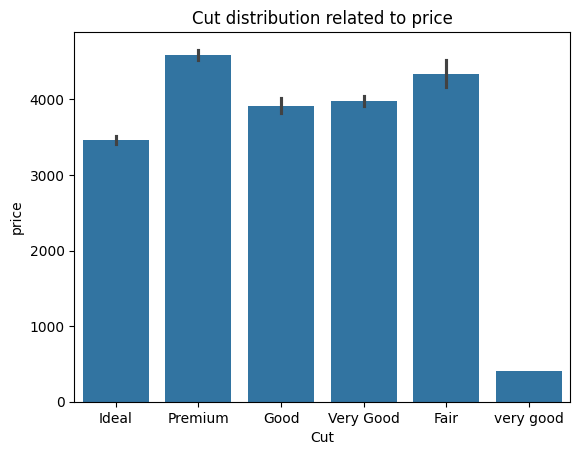

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(x='cut',y='price', data=df)
plt.title('Cut distribution related to price')
plt.xlabel('Cut')
plt.ylabel('price')
plt.show()

This histogram shows that the distribution of most of the diamonds lies in a low price range and as the frequency of the diamonds decrease the price increase it also shows that ideal diamonds lie at highest prices

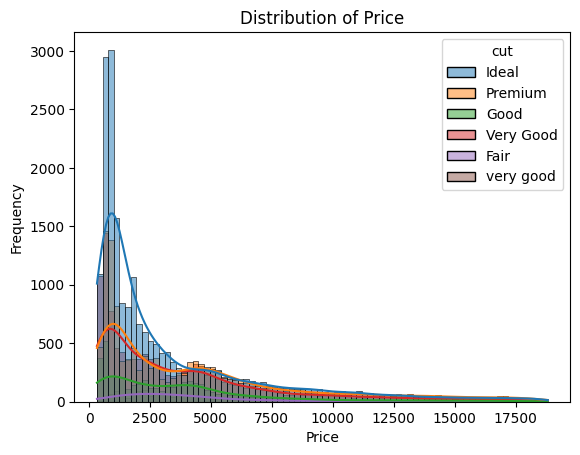

In [ ]:
plt.figsize=(10,8)
sns.histplot(data = df,x = 'price',hue = 'cut', kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

this scatterplot shows that there is no strong correlation between depth and price but it shows that as the clarity increase the price increases

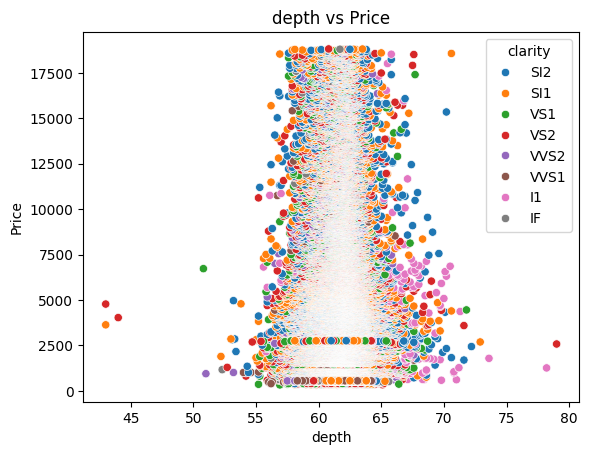

In [ ]:
sns.scatterplot(x='depth', y='price', hue ='clarity' ,data=df)
plt.title('depth vs Price')
plt.xlabel('depth')
plt.ylabel('Price')
plt.show()

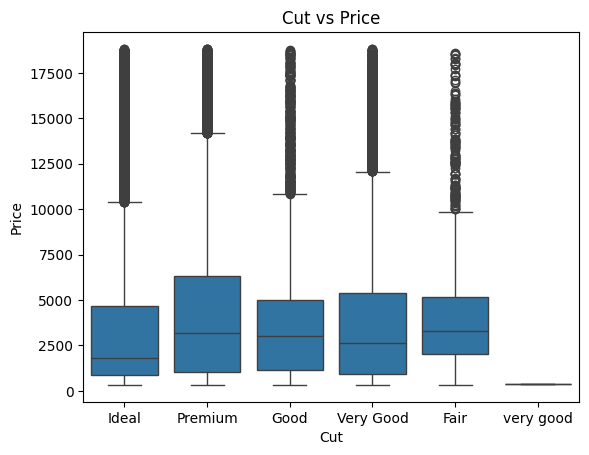

In [ ]:
sns.boxplot(x='cut', y='price', data=df)
plt.title('Cut vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

In [ ]:
  IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
  lower_bound = df['price'].quantile(0.25) - (1.5 * IQR)
  upper_bound = df['price'].quantile(0.75) + (1.5 * IQR)
  df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Numeric data visualization

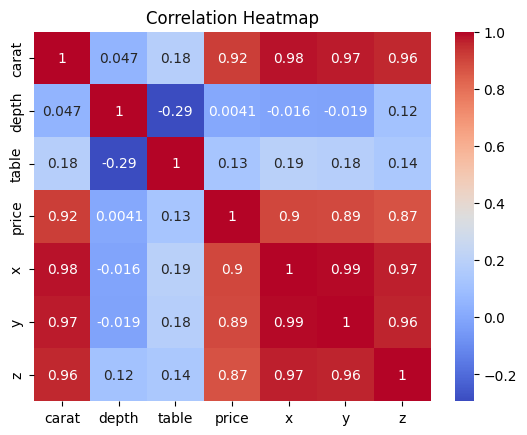

In [ ]:
ff =df.select_dtypes(include=['int64','float64'])
sns.heatmap(ff.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

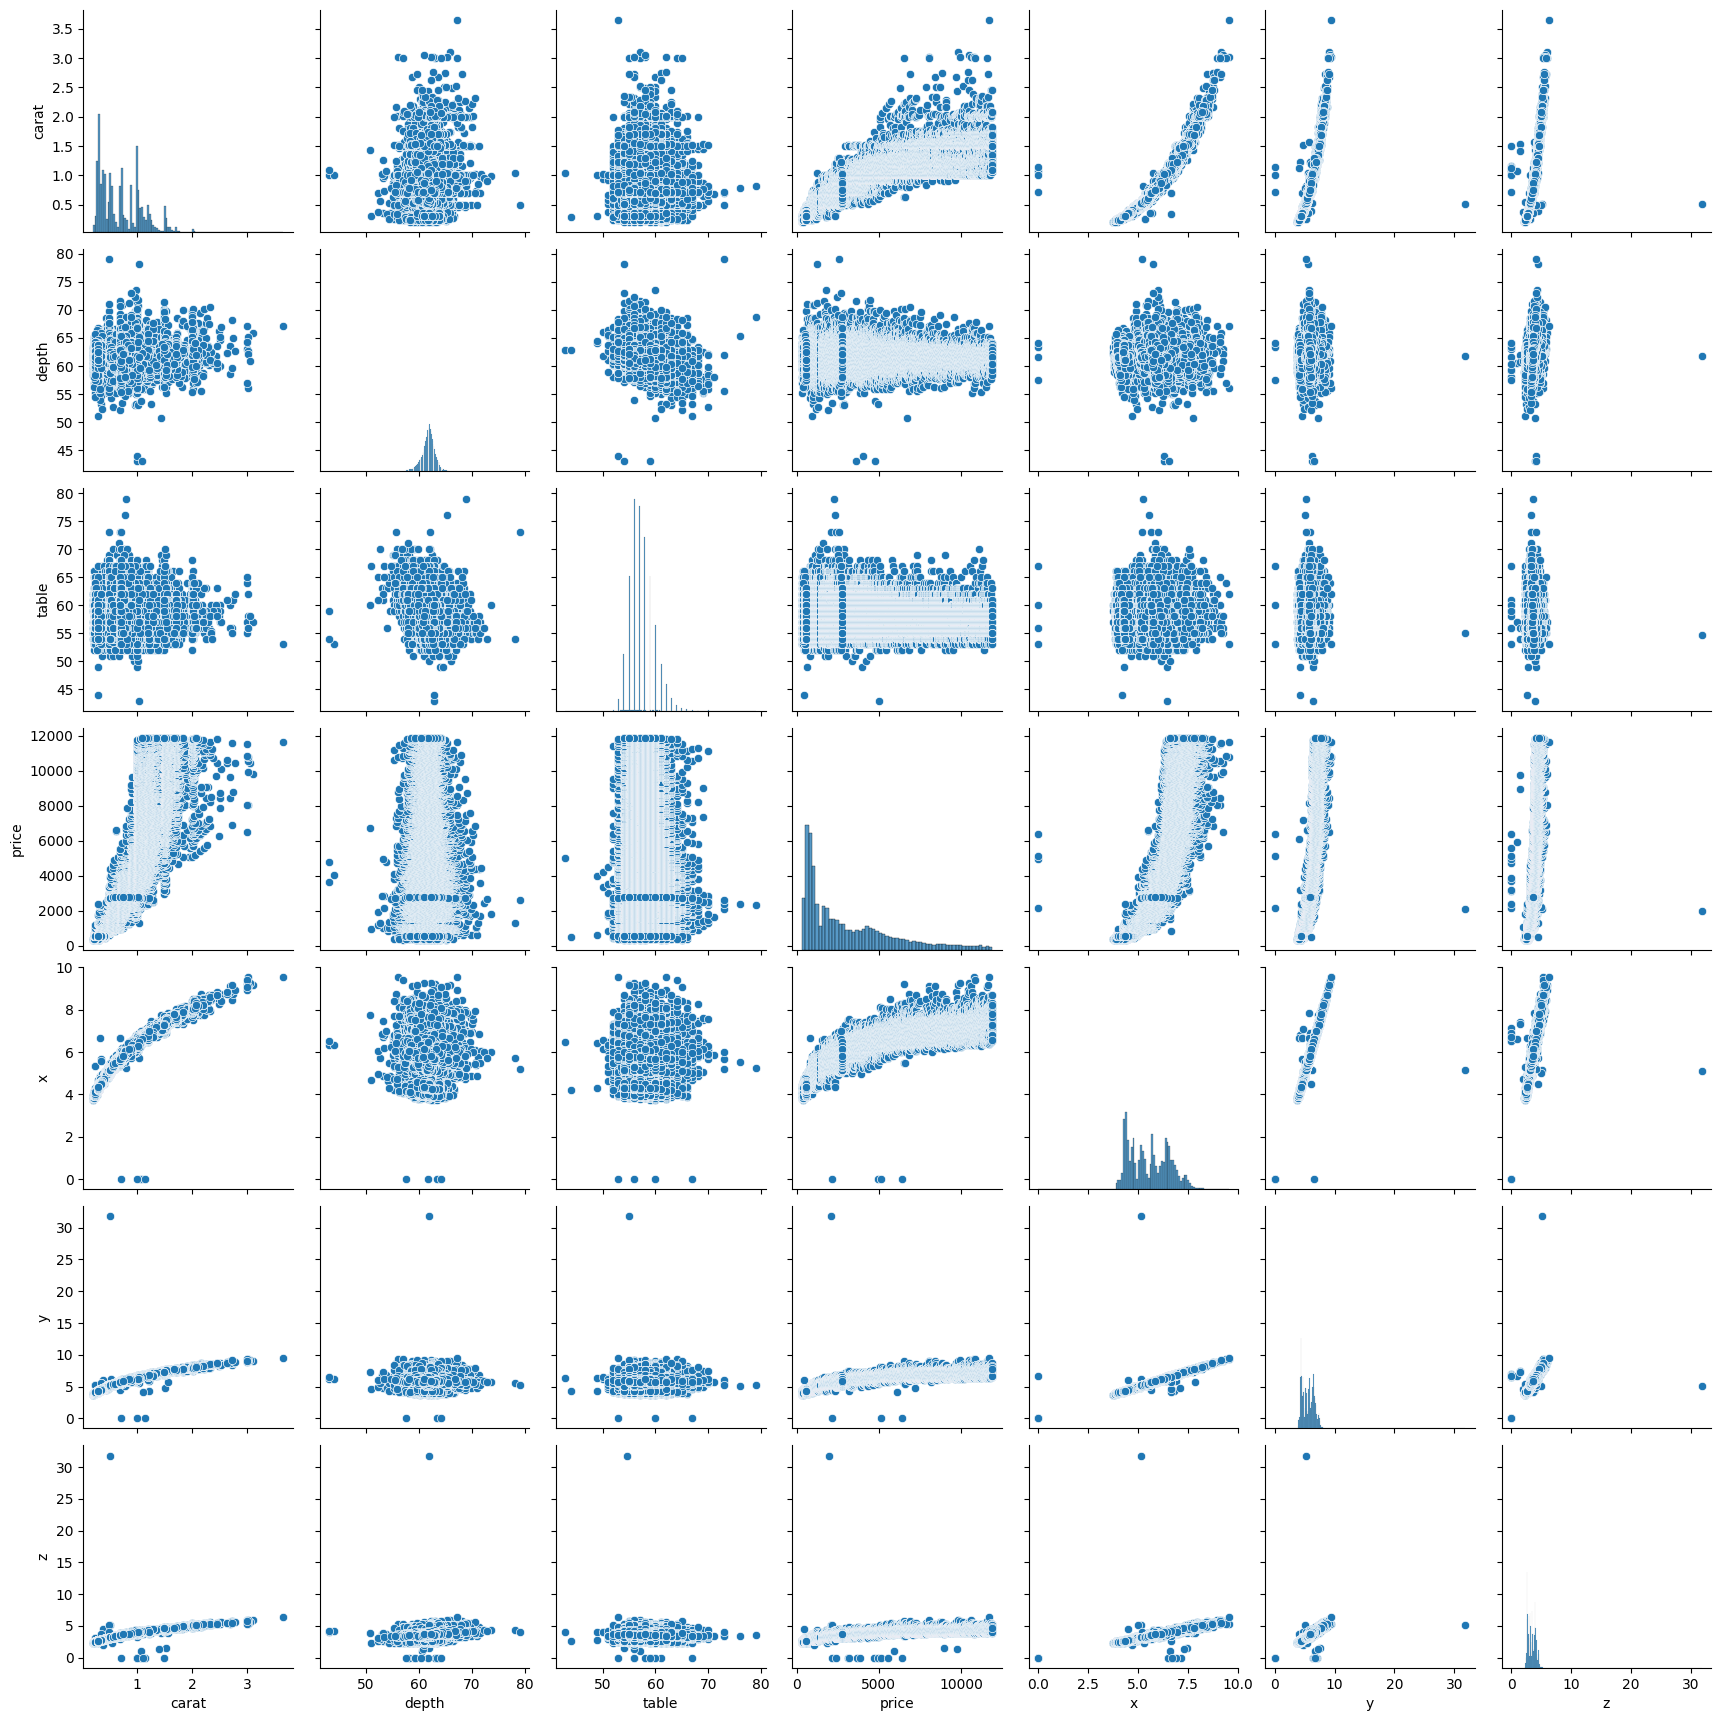

In [ ]:
sns.pairplot(ff)
plt.show()

# Categorical Data Encoding

In [ ]:
# Ordinal columns encoding
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

df['cut_encoded'] = df['cut'].replace(cut_mapping)

print(df[['cut', 'cut_encoded']].head())

clarity_mapping = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
}

df['clarity_encoded'] = df['clarity'].replace(clarity_mapping)

print(df[['clarity', 'clarity_encoded']].head())

       cut cut_encoded
0    Ideal           5
1  Premium           4
2     Good           2
3  Premium           4
4     Good           2
  clarity clarity_encoded
0     SI2               2
1     SI1               3
2     VS1               5
3     VS2               4
4     SI2               2


In [ ]:
#nominal column encoding
df_color_encoded = pd.get_dummies(df['color'], prefix='color')

df = pd.concat([df, df_color_encoded], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2,False,True,False,False,False,False,False
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,3,False,True,False,False,False,False,False
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,5,False,True,False,False,False,False,False
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,4,False,False,False,False,False,True,False
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,2,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,3,True,False,False,False,False,False,False
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,3,True,False,False,False,False,False,False
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,3,True,False,False,False,False,False,False
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,2,False,False,False,False,True,False,False


# Scaling

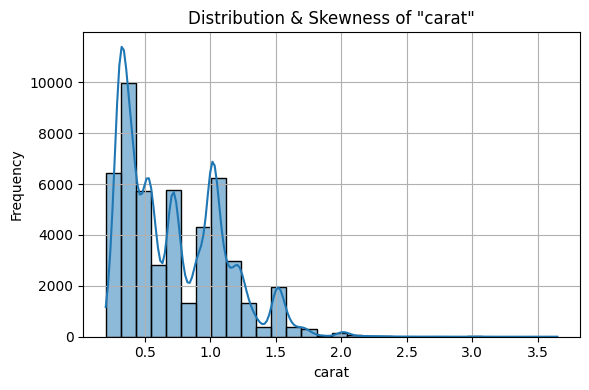

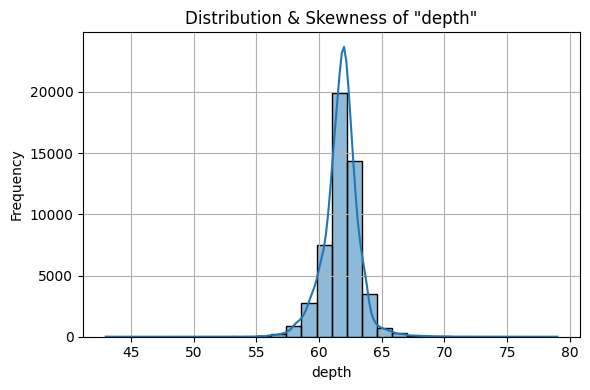

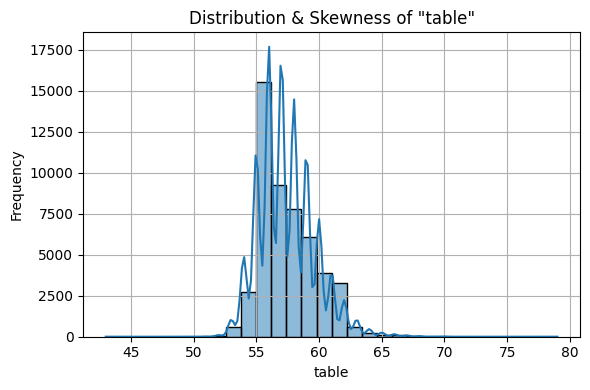

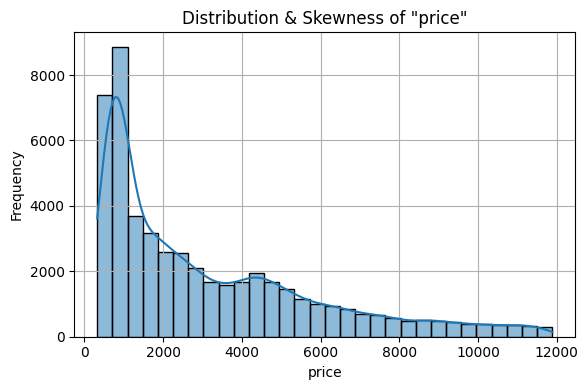

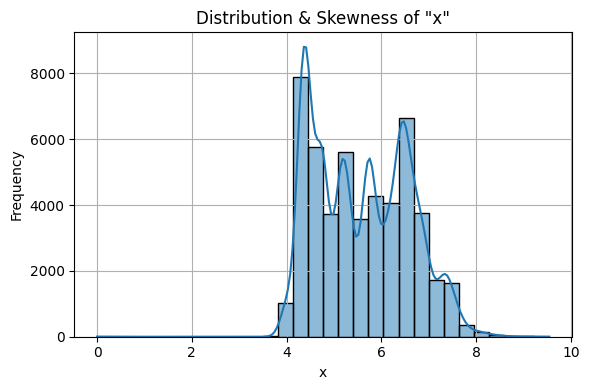

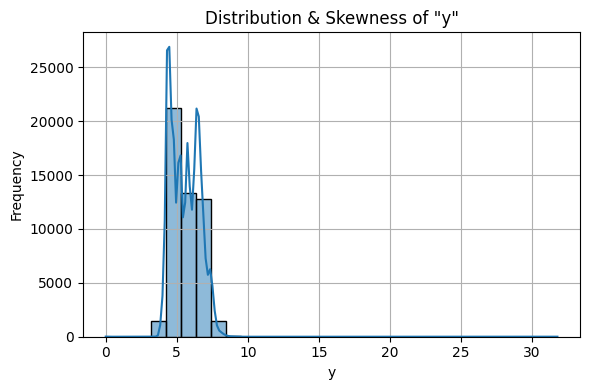

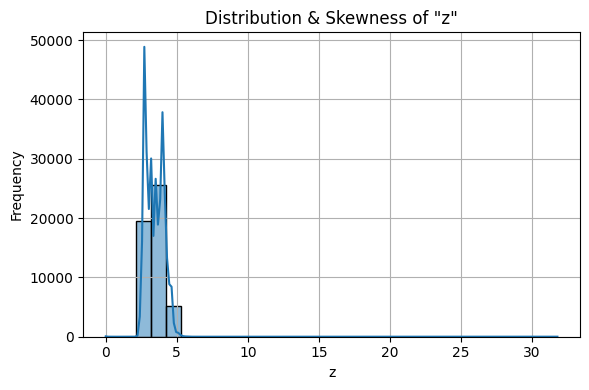

In [ ]:
# skewness visualization of each numeric column
for col in ff:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution & Skewness of "{col}"')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# numerical data scaling using min max scaler to adjust values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scalee = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
scaler = MinMaxScaler()
df[scalee] = scaler.fit_transform(df[scalee])
df[scalee]


,carat,depth,table,price,x,y,z
0,0.008696,0.513889,0.333333,0.000000,0.414046,0.125157,0.076415
1,0.002899,0.466667,0.500000,0.000000,0.407757,0.120755,0.072642
2,0.008696,0.386111,0.611111,0.000086,0.424528,0.127987,0.072642
3,0.026087,0.538889,0.416667,0.000692,0.440252,0.133019,0.082704
4,0.031884,0.563889,0.416667,0.000778,0.454927,0.136792,0.086478
...,...,...,...,...,...,...,...
53935,0.150725,0.494444,0.388889,0.210258,0.602725,0.181132,0.110063
53936,0.150725,0.558333,0.333333,0.210258,0.596436,0.180818,0.113522
53937,0.144928,0.550000,0.472222,0.210258,0.593291,0.178616,0.111950
53938,0.191304,0.500000,0.416667,0.210258,0.644654,0.192453,0.117610
